##### Initialization: definition of robots and coordinates

In [1]:
import numpy as np
from UAV import *
import random
import matplotlib.pyplot as plt   


n_robots = 10#int(input("number of robots: "))
n_components = 2
platoon = []


# initialization of n robots
for i in range(n_robots):
    if i==0:
        i_robot = Robot("op_" + str(i),0,0,0)
    else:
        i_robot = Robot("op_" + str(i),random.uniform(0, 10.0),random.uniform(0, 10.0),0)
    platoon.append(i_robot)

coordinates = [[],[],[]]

for rob in platoon:
    coordinates = np.append(coordinates,rob.get_coords(),axis=1)

#TRUE COORDINATES [REALITY: THEY ARE UNKNOWN]
S = coordinates[0:2,:]

print(S)

[[0.         7.87070585 6.91731431 9.36303466 7.03505088 3.6273803
  1.86747415 1.30305183 3.68465746 4.11280164]
 [0.         7.40551457 1.4985008  4.88617175 8.26191887 4.93263542
  6.62756192 4.83951643 9.33196067 9.64824798]]


##### Definition of the (squared) distance matrix

In [2]:
DM2 = d_matrix2(platoon) #squared distance matrix -> for formulas
print(DM2)

#double check the distances
print('\n',DM2 - DM_from_S(S))

[[  0.         116.78965658  50.09474192 111.5410924  117.75124441
   37.48878008  47.41203663  25.11886338 100.66219061 110.00382636]
 [116.78965658   0.          35.80176702   8.5741335    1.43174756
   24.12094296  36.64400121  49.71842579  21.23419573  19.15169716]
 [ 50.09474192  35.80176702   0.          17.45786247  45.75768587
   22.61694635  51.80815356  42.68232867  71.81316384  74.28367024]
 [111.5410924    8.5741335   17.45786247   0.          16.81517709
   32.89988976  59.21586711  64.96549998  52.00900677  50.24231668]
 [117.75124441   1.43174756  45.75768587  16.81517709   0.
   22.69634708  29.37497201  44.56865165  12.37012556  10.461449  ]
 [ 37.48878008  24.12094296  22.61694635  32.89988976  22.69634708
    0.           5.9700455    5.41117401  19.35734333  22.47263562]
 [ 47.41203663  36.64400121  51.80815356  59.21586711  29.37497201
    5.9700455    0.           3.5156792   10.61592784  14.16603985]
 [ 25.11886338  49.71842579  42.68232867  64.96549998  44.56865

##### S* estimation through EigenValue Decomposition

In [3]:
S_star = EVD(DM2,n_components)
print(S_star)

[[ 8.42014666 -3.16894901  2.24961222 -1.70115928 -3.40133606  0.63905001
   0.57899169  2.38956132 -2.29336616 -2.70686685]
 [ 0.08641858  1.79342334  4.33892733  4.58289632  0.6225073  -0.68985052
  -2.89221807 -2.34065157 -2.68684512 -2.45853584]]


/mnt/c/Users/pierf/Desktop/drone-pose-estimation/UAV/Algebra.py:162: ComplexWarning: Casting complex values to real discards the imaginary part
  LAMBDA[i,i] = ev[ind]
/mnt/c/Users/pierf/Desktop/drone-pose-estimation/UAV/Algebra.py:163: ComplexWarning: Casting complex values to real discards the imaginary part
  U[:,i] = EV[:,ind]


##### Removal of the ambiguity generated by distances in an Universal Euclidean transformation

In [4]:
#Translation removal
S_star = match_anchor(S,S_star,verbose=1)
print(S_star)

X displacement:  -8.420146658608473
Y displacement:  -0.08641857845555237
Displacement matrix:
 [[-8.42014666 -8.42014666 -8.42014666 -8.42014666 -8.42014666 -8.42014666
  -8.42014666 -8.42014666 -8.42014666 -8.42014666]
 [-0.08641858 -0.08641858 -0.08641858 -0.08641858 -0.08641858 -0.08641858
  -0.08641858 -0.08641858 -0.08641858 -0.08641858]]
[[  0.         -11.58909567  -6.17053444 -10.12130594 -11.82148272
   -7.78109665  -7.84115497  -6.03058534 -10.71351282 -11.12701351]
 [  0.           1.70700476   4.25250875   4.49647774   0.53608872
   -0.7762691   -2.97863665  -2.42707015  -2.7732637   -2.54495442]]


The new coordinates may be affected by rotation and flip ambiguities. Thus we must solve the problem with further analysis

##### Identification of rotation ambiguity

DM' : a new acquisition for the distances

We now introduce a displacement for the anchor, in order to build a new (squared) distance matrix.

In reality what we do is applying a displacement to the anchor and we get a new distance matrix

In [5]:
deltaX1 = 0.3
deltaY1 = 0.1

DeltaS_prime = np.array([[0 for i in range(n_robots)] for j in range(2)],dtype=float)
DeltaS_prime[:,0] = [deltaX1,deltaY1]

S_prime = S + DeltaS_prime
print(S_prime)

DM_prime = DM_from_S(S_prime,verbose=1)

[[0.3        7.87070585 6.91731431 9.36303466 7.03505088 3.6273803
  1.86747415 1.30305183 3.68465746 4.11280164]
 [0.1        7.40551457 1.4985008  4.88617175 8.26191887 4.93263542
  6.62756192 4.83951643 9.33196067 9.64824798]]
DM' :
 [[  0.         110.68613016  45.74465318 105.04603725 111.97783011
   34.42582482  45.06603976  23.469129    96.685004   105.70649578]
 [110.68613016   0.          35.80176702   8.5741335    1.43174756
   24.12094296  36.64400121  49.71842579  21.23419573  19.15169716]
 [ 45.74465318  35.80176702   0.          17.45786247  45.75768587
   22.61694635  51.80815356  42.68232867  71.81316384  74.28367024]
 [105.04603725   8.5741335   17.45786247   0.          16.81517709
   32.89988976  59.21586711  64.96549998  52.00900677  50.24231668]
 [111.97783011   1.43174756  45.75768587  16.81517709   0.
   22.69634708  29.37497201  44.56865165  12.37012556  10.461449  ]
 [ 34.42582482  24.12094296  22.61694635  32.89988976  22.69634708
    0.           5.9700455   

Estimation of the rotation angle $\theta_r$

In [6]:
"""theta1a, theta1b = estimate_theta2(DM2,DM_prime,S_star,[deltaX1,deltaY1],index=1,verbose=1)
print(theta1a)
print(theta1b)

theta2a, theta2b = estimate_theta2(DM2,DM_prime,S_star,[deltaX1,deltaY1],index=2,verbose=1)
print(theta2a)
print(theta2b)"""

print("------------------------------------")
theta3a, theta3b = estimate_theta3(DM2,DM_prime,S_star,[deltaX1,deltaY1],index=1,verbose=1)
print(theta3a)
print(theta3b)

theta4a, theta4b = estimate_theta3(DM2,DM_prime,S_star,[deltaX1,deltaY1],index=2,verbose=1)
print(theta4a)
print(theta4b)

------------------------------------
1.4603799476040746
2.6171987955185205
2.1446398613406417
2.8472863828747697


In [7]:
theta_r   = estimate_theta(DM2,DM_prime,S_star,[deltaX1,deltaY1],verbose=1)
theta_r_a = estimate_theta(DM2,DM_prime,S_star,[deltaX1,deltaY1],approx = 1,verbose=1)

Coordinates to work with: 1-th and 2-th
After normalization: 
cos(theta):	-0.591709
sin(theta):	0.806152

Actual theta:	 2.2039729524011937
Approx theta:	Disabled
Coordinates to work with: 1-th and 2-th
After normalization: 
cos(theta):	-0.591709
sin(theta):	0.806152

Actual theta:	 2.2039729524011937
Approx theta:	 2.204


S** : estimated-rotated coordinates

In [8]:
S_star2 = rotateMatrix(theta_r)@S_star
S_star2a = rotateMatrix(theta_r_a)@S_star

##### Identification of flip ambiguity

We have to check if there is any flip ambiguity. To do so, we have to move the anchor one more time

In [9]:
deltaX2 = 0.7
deltaY2 = 0.4

DeltaS_prime2 = np.array([[0 for i in range(n_robots)] for j in range(2)],dtype=float)
DeltaS_prime2[:,0] = [deltaX2,deltaY2]

S_prime2 = S + DeltaS_prime2
print(S_prime)

DM_prime2 = DM_from_S(S_prime2,verbose=1)

[[0.3        7.87070585 6.91731431 9.36303466 7.03505088 3.6273803
  1.86747415 1.30305183 3.68465746 4.11280164]
 [0.1        7.40551457 1.4985008  4.88617175 8.26191887 4.93263542
  6.62756192 4.83951643 9.33196067 9.64824798]]
DM' :
 [[  0.         100.49625674  39.86170125  95.17390648 101.94263808
   29.11433932  40.14552329  20.07297768  88.68810163  97.17730568]
 [100.49625674   0.          35.80176702   8.5741335    1.43174756
   24.12094296  36.64400121  49.71842579  21.23419573  19.15169716]
 [ 39.86170125  35.80176702   0.          17.45786247  45.75768587
   22.61694635  51.80815356  42.68232867  71.81316384  74.28367024]
 [ 95.17390648   8.5741335   17.45786247   0.          16.81517709
   32.89988976  59.21586711  64.96549998  52.00900677  50.24231668]
 [101.94263808   1.43174756  45.75768587  16.81517709   0.
   22.69634708  29.37497201  44.56865165  12.37012556  10.461449  ]
 [ 29.11433932  24.12094296  22.61694635  32.89988976  22.69634708
    0.           5.9700455   

Now we estimate a second rotation angle $\theta_{r2}$: if = 0, no flip ambiguity

theta_r2 :  0.0


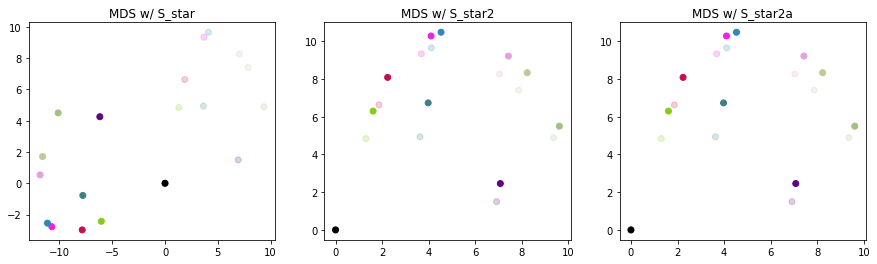

In [10]:
theta_r2 = estimate_theta(DM2,DM_prime2,S_star2,[deltaX2,deltaY2],approx=2,verbose=0)
print("theta_r2 : ", theta_r2)


if (theta_r2 != 0):
  F = np.array([[-1,0],[0,1]])
    
  theta_r3 = estimate_theta(DM2,DM_prime,F@S_star,[deltaX1,deltaY1],verbose=0)
  theta_r3_a = estimate_theta(DM2,DM_prime,F@S_star,[deltaX1,deltaY1],approx=1,verbose=0)

  print("Wrong estimated angle:",theta_r)
  print("True  estimated angle:", theta_r3)

  S_star2 = rotateMatrix(theta_r3)@F@S_star
  S_star2a = rotateMatrix(theta_r3_a)@F@S_star


plot_points(S,S_star  = S_star,
              S_star2 = S_star2,
              S_star2a = S_star2a
            )